# Creating a Rough Model to evaluate the Feature Selection Process

To evaluate the impact of feature removal, a baseline Random Forest classifier was initially trained using all available features. Model performance was assessed using appropriate classification metrics such as Recall, F1-score, and ROC-AUC, given the imbalanced nature of the fraud detection problem.

Subsequently, low-importance or redundant features were removed based on feature importance analysis. The model was retrained using the reduced feature set, and performance metrics were compared against the baseline model. If the removal of specific features resulted in a significant decline in performance, those features were retained. Otherwise, they were permanently excluded from the dataset.

This iterative approach ensured that only meaningful and high-impact variables were retained, thereby improving model efficiency without compromising fraud detection capability.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
pd.set_option('display.max_columns', None)

In [82]:
df = pd.read_csv(r'C:\Users\mabin\Desktop\DataScienceClassNotes\Career247_Capstone_Project\Fraud_Detection_Project\data\raw\cleaned_data_v2.csv')

In [83]:
df.columns

Index(['transaction_month', 'transaction_day', 'amount', 'payment_method',
       'is_international', 'merchant_category', 'ip_address_risk_score',
       'device_trust_score', 'txn_count_last_24h', 'avg_amount_last_24h',
       'merchant_diversity_last_7d', 'device_change_flag',
       'location_change_flag', 'authentication_method',
       'otp_success_rate_customer', 'past_fraud_count_customer',
       'past_disputes_customer', 'merchant_historical_fraud_rate',
       'hour_of_day', 'day_of_week', 'is_weekend', 'cust_txn_count',
       'cust_fraud_count', 'cust_fraud_rate', 'cust_avg_amt', 'amt_deviation',
       'amt_ratio', 'device_count', 'new_device_flag', 'merchant_fraud_rate',
       'otp_risk', 'combined_risk', 'is_fraud'],
      dtype='object')

In [84]:
df.drop('new_device_flag', inplace=True, axis=1)

In [85]:
df.columns

Index(['transaction_month', 'transaction_day', 'amount', 'payment_method',
       'is_international', 'merchant_category', 'ip_address_risk_score',
       'device_trust_score', 'txn_count_last_24h', 'avg_amount_last_24h',
       'merchant_diversity_last_7d', 'device_change_flag',
       'location_change_flag', 'authentication_method',
       'otp_success_rate_customer', 'past_fraud_count_customer',
       'past_disputes_customer', 'merchant_historical_fraud_rate',
       'hour_of_day', 'day_of_week', 'is_weekend', 'cust_txn_count',
       'cust_fraud_count', 'cust_fraud_rate', 'cust_avg_amt', 'amt_deviation',
       'amt_ratio', 'device_count', 'merchant_fraud_rate', 'otp_risk',
       'combined_risk', 'is_fraud'],
      dtype='object')

In [54]:
df.shape

(50000, 32)

In [55]:
df.head()

,transaction_month,transaction_day,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,cust_txn_count,cust_fraud_count,cust_fraud_rate,cust_avg_amt,amt_deviation,amt_ratio,device_count,merchant_fraud_rate,otp_risk,combined_risk,is_fraud
0,1,18,18780.52,WALLET,0,Travel,0.243550,0.116606,7,6055.25,3,0,0,NONE,0.769328,1,2,0.069502,19,3,0,16,3,0.176471,10618.727500,8161.792500,1.768456,16,0.078652,0.230672,0.122671,0
1,3,30,18955.06,CARD,0,Electronics,0.119761,0.030579,1,13366.74,5,0,1,OTP,0.468411,1,1,0.010010,2,5,1,13,1,0.071429,11040.679231,7914.380769,1.716683,13,0.129412,0.531589,0.166570,0
2,1,4,10743.34,UPI,0,Fashion,0.565367,0.183770,0,7359.14,4,0,0,PIN,0.464356,0,1,0.118434,17,3,0,7,0,0.000000,8610.030000,2133.310000,1.247625,7,0.078947,0.535644,0.130813,0
3,1,27,5054.75,CARD,0,Utilities,0.843842,0.717286,5,10923.57,6,0,0,PIN,0.635799,0,3,0.114947,16,5,1,14,0,0.000000,10496.891429,-5442.141429,0.481501,14,0.108974,0.364201,0.105532,0
4,2,20,14799.50,CARD,0,Gaming,0.202402,0.041616,11,6027.72,10,1,0,OTP,0.684301,2,0,0.014550,23,1,0,10,0,0.000000,12091.451000,2708.049000,1.223863,10,0.132530,0.315699,0.102899,0


In [56]:
from sklearn.preprocessing import OrdinalEncoder

# Creating copy of data
encode_df = df.copy()

categorical_col = df.select_dtypes(include=['object']).columns

for col in categorical_col:
    oe = OrdinalEncoder()
    encode_df[col] = oe.fit_transform(encode_df[[col]])
    
X_label = encode_df.drop('is_fraud', axis=1)
y_label = encode_df['is_fraud']

In [57]:
X_label

,transaction_month,transaction_day,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,cust_txn_count,cust_fraud_count,cust_fraud_rate,cust_avg_amt,amt_deviation,amt_ratio,device_count,merchant_fraud_rate,otp_risk,combined_risk
0,1,18,18780.52,3.0,0,4.0,0.243550,0.116606,7,6055.25,3,0,0,1.0,0.769328,1,2,0.069502,19,3,0,16,3,0.176471,10618.727500,8161.792500,1.768456,16,0.078652,0.230672,0.122671
1,3,30,18955.06,0.0,0,0.0,0.119761,0.030579,1,13366.74,5,0,1,2.0,0.468411,1,1,0.010010,2,5,1,13,1,0.071429,11040.679231,7914.380769,1.716683,13,0.129412,0.531589,0.166570
2,1,4,10743.34,2.0,0,1.0,0.565367,0.183770,0,7359.14,4,0,0,3.0,0.464356,0,1,0.118434,17,3,0,7,0,0.000000,8610.030000,2133.310000,1.247625,7,0.078947,0.535644,0.130813
3,1,27,5054.75,0.0,0,5.0,0.843842,0.717286,5,10923.57,6,0,0,3.0,0.635799,0,3,0.114947,16,5,1,14,0,0.000000,10496.891429,-5442.141429,0.481501,14,0.108974,0.364201,0.105532
4,2,20,14799.50,0.0,0,2.0,0.202402,0.041616,11,6027.72,10,1,0,2.0,0.684301,2,0,0.014550,23,1,0,10,0,0.000000,12091.451000,2708.049000,1.223863,10,0.132530,0.315699,0.102899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,20,3675.86,2.0,0,4.0,0.973531,0.051970,2,10063.79,11,0,0,1.0,0.587274,1,2,0.129647,9,1,0,17,1,0.055556,9463.625294,-5787.765294,0.388379,17,0.110429,0.412726,0.132341
49996,1,31,10991.62,0.0,0,4.0,0.705022,0.611022,11,13832.37,7,0,0,2.0,0.981491,0,2,0.075207,21,2,0,18,1,0.052632,12173.322222,-1181.702222,0.902853,18,0.071006,0.018509,0.040793
49997,1,11,2756.24,2.0,0,2.0,0.664222,0.606437,1,11402.88,9,0,0,2.0,0.520483,2,4,0.099820,21,3,0,11,0,0.000000,9856.430000,-7100.190000,0.279610,11,0.137500,0.479517,0.137153
49998,3,22,9097.91,2.0,0,0.0,0.836687,0.526284,9,13695.92,3,0,0,2.0,0.834526,2,2,0.040324,7,4,0,13,1,0.071429,10248.005385,-1150.095385,0.887687,13,0.084848,0.165474,0.079978


In [58]:
y_label

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: is_fraud, Length: 50000, dtype: int64

In [59]:
X_label.shape

(50000, 31)

In [60]:
y_label.shape

(50000,)

Before proceeding further, it is important to address the severe class imbalance present in the dataset.

In [ ]:
y_label.value_counts(normalize=True)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2,stratify=y_label, random_state=42)

In [62]:
print("Before OverSampling, counts of label '1' : {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0' : {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1' : 4022
Before OverSampling, counts of label '0' : 35978


In [63]:
# Doing sampling
# SMOTE

# install imbalanced-learn if not already available
# %pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [64]:
print("After OverSampling, counts of label '1' : {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0' : {}".format(sum(y_train_sm == 0)))

After OverSampling, counts of label '1' : 35978
After OverSampling, counts of label '0' : 35978


### Without removing columns

In [65]:
from sklearn.metrics import classification_report, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [66]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_sm,y_train_sm)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [67]:
y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [68]:
recall = recall_score(y_test, y_pred)
print("Recall :", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score", f1)

rou_auc = roc_auc_score(y_test, y_prob)
print("ROU-AUC :", rou_auc)

Recall : 0.09244532803180915
F1-Score 0.13182140326009922
ROU-AUC : 0.7597442363829033


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      8994
           1       0.23      0.09      0.13      1006

    accuracy                           0.88     10000
   macro avg       0.57      0.53      0.53     10000
weighted avg       0.84      0.88      0.85     10000



In [70]:
confusion_matrix(y_test,y_pred)

array([[8682,  312],
       [ 913,   93]])

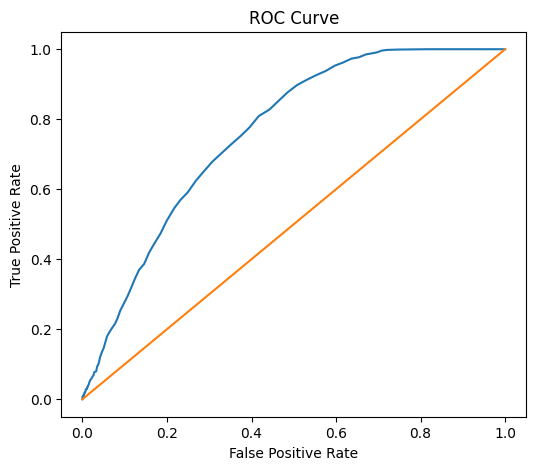

In [71]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Removing Columns

In [72]:
X_label_1 = X_label.drop(columns=['day_of_week', 'cust_txn_count', 'device_count', 'past_disputes_customer', 'cust_fraud_count', 'payment_method', 'authentication_method', 'transaction_month', 'past_fraud_count_customer', 'is_weekend', 'is_international'], axis=1)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_label_1, y_label, test_size=0.2,stratify=y_label, random_state=42)

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [75]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_sm,y_train_sm)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [76]:
y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [77]:
recall = recall_score(y_test, y_pred)
print("Recall :", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score", f1)

rou_auc = roc_auc_score(y_test, y_prob)
print("ROU-AUC :", rou_auc)

Recall : 0.18986083499005965
F1-Score 0.20749592612710482
ROU-AUC : 0.7494110277185011


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8994
           1       0.23      0.19      0.21      1006

    accuracy                           0.85     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.84      0.85      0.85     10000



In [79]:
confusion_matrix(y_test,y_pred)

array([[8350,  644],
       [ 815,  191]])